In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


Checking the columns with most NaN counts.

In [85]:
nan_counts = df.isnull().sum()
print(nan_counts)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [86]:
tweet_id_counts = df['tweet_id'].value_counts()
duplicate_tweet_ids = tweet_id_counts[tweet_id_counts > 1]
print(duplicate_tweet_ids)

tweet_id
570308309682675712    2
570308064185880577    2
570307949614256128    2
570307948171423745    2
570307434113310720    2
                     ..
569680231012773888    2
569622568459636736    2
569621879633391616    2
569601363799359488    2
569600137296633856    2
Name: count, Length: 155, dtype: int64


In [87]:
unique_locations = df['tweet_location'].unique()
print(len(unique_locations))

3082


In [88]:
# filtered_df = df.drop(columns=['tweet_id', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_location'])
# filtered_df

Southwest
570


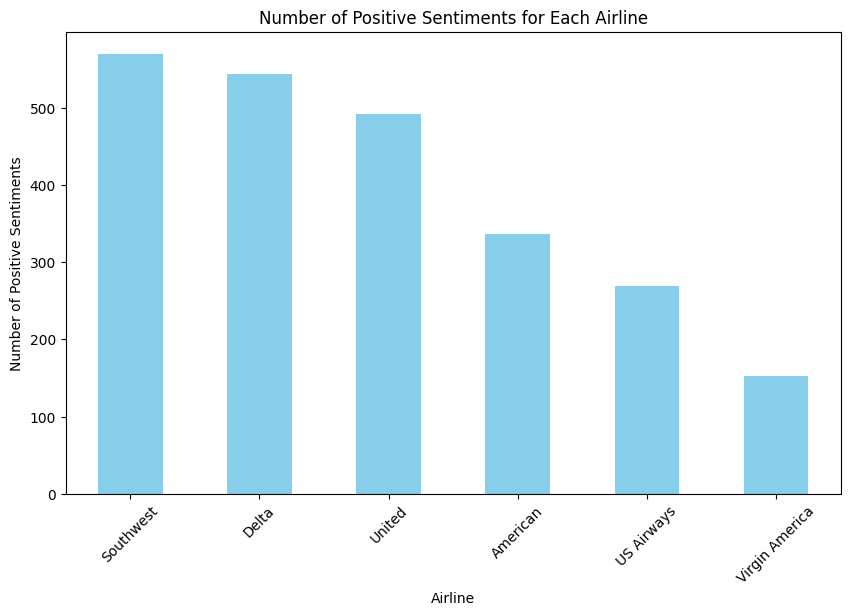

In [89]:
positive_sentiment_df = df[df['airline_sentiment'] == 'positive']
positive_airline_counts = positive_sentiment_df['airline'].value_counts()

most_positive_airline = positive_airline_counts.idxmax()
most_positive_count = positive_airline_counts.max()

print(most_positive_airline)
print(most_positive_count)

plt.figure(figsize=(10, 6))
positive_airline_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Positive Sentiments for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Positive Sentiments')
plt.xticks(rotation=45)
plt.show()


United
2633


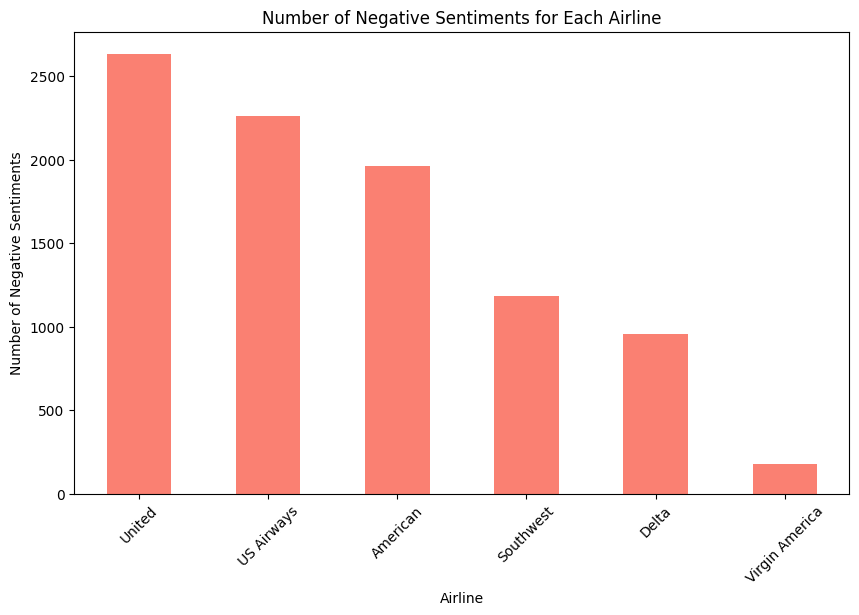

In [90]:
negative_sentiment_df = df[df['airline_sentiment'] == 'negative']
negative_airline_counts = negative_sentiment_df['airline'].value_counts()

most_negative_airline = negative_airline_counts.idxmax()
most_negative_count = negative_airline_counts.max()

print(most_negative_airline)
print(most_negative_count)

plt.figure(figsize=(10, 6))
negative_airline_counts.plot(kind='bar', color='salmon')
plt.title('Number of Negative Sentiments for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Negative Sentiments')
plt.xticks(rotation=45)
plt.show()

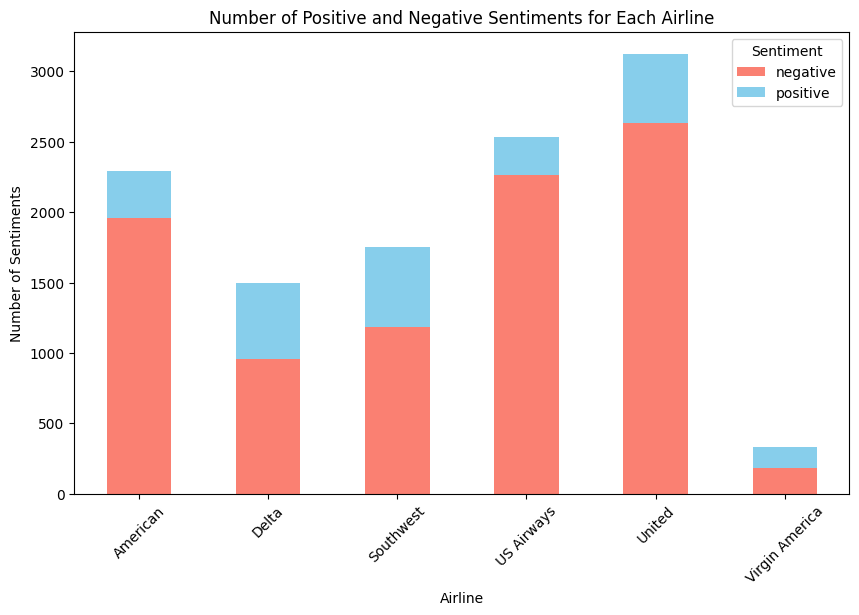

In [91]:
filtered_df = df[df['airline_sentiment'].isin(['positive', 'negative'])]
sentiment_counts = filtered_df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'])
plt.title('Number of Positive and Negative Sentiments for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Sentiments')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()